sentimen aplikasi zenius

1.instal *lebery*

In [ ]:
import pandas as pd
import string
from sklearn.pipeline import Pipeline
import numpy as np


Dataset

In [ ]:
df_review = pd.read_excel("/content/zenius_data.xlsx")
df_review.head(5)

,userName,ranting,tanggal,ulasan
0,Dewi Adikara,5,2022-06-27 13:20:04,"Dewi udah cobain Zenius, menyenangkan banget c..."
1,KEYSHA DWI SETIYANI,5,2022-06-27 12:57:24,pembelajaran seru dan mudahh dipahami
2,Sri Wahyuni,5,2022-06-27 05:58:22,Aplikasi Zenius sangat membantu adikku untuk b...
3,D.A.P Official,5,2022-06-27 05:41:55,Ada kurikulum baru kurikulum 2022 Implementasi...
4,Nabila Albatul,1,2022-06-27 04:59:09,Hai Zenius aku akan memberi 5 bintang nanti ka...


In [ ]:
df_as = pd.read_excel("/content/zenius_data.xlsx")

In [ ]:
df_as['ranting'].value_counts()

5    887
4    242
3    159
1    130
2     82
Name: ranting, dtype: int64

Menampilkan grafik frekuensi rating

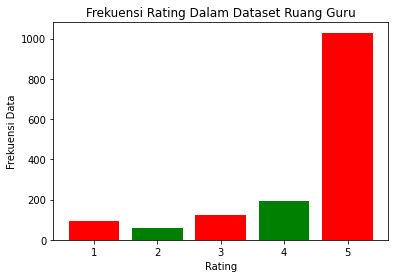

In [ ]:
import matplotlib.pyplot as plt

# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5]

# heights of bars
height = [93, 59, 124, 195, 1029]

# labels for bars
tick_label = [1, 2, 3, 4, 5]

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('Rating')
# naming the y-axis
plt.ylabel('Frekuensi Data')
# plot title
plt.title('Frekuensi Rating Dalam Dataset Ruang Guru')

# function to show the plot
plt.show()

#jumlah rating

In [ ]:
df_review["ranting"].value_counts()

5    887
4    242
3    159
1    130
2     82
Name: ranting, dtype: int64

2.plabelan

In [ ]:
sentimen = []
for index, row in df_review.iterrows():
     if row['ranting']>=3:
        sentimen.append('positif')
     else:
       sentimen.append('negatif')
df_review['sentimen'] = sentimen
df_review = df_review.drop(columns=['ranting'])
df_review.head()

,userName,tanggal,ulasan,sentimen
0,Dewi Adikara,2022-06-27 13:20:04,"Dewi udah cobain Zenius, menyenangkan banget c...",positif
1,KEYSHA DWI SETIYANI,2022-06-27 12:57:24,pembelajaran seru dan mudahh dipahami,positif
2,Sri Wahyuni,2022-06-27 05:58:22,Aplikasi Zenius sangat membantu adikku untuk b...,positif
3,D.A.P Official,2022-06-27 05:41:55,Ada kurikulum baru kurikulum 2022 Implementasi...,positif
4,Nabila Albatul,2022-06-27 04:59:09,Hai Zenius aku akan memberi 5 bintang nanti ka...,negatif


In [ ]:
df_review['sentimen'].value_counts()

positif    1288
negatif     212
Name: sentimen, dtype: int64

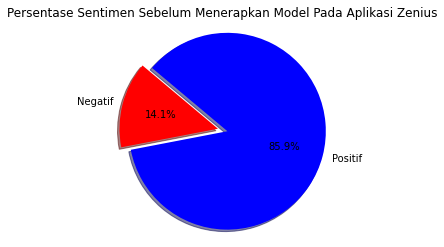

Negatif = 212
Positif = 1288
Jumlah Keseluruhan Data = 1500


In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Negatif', 'Positif'
sizes = [212, 1288]
colors = ['red', 'blue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Persentase Sentimen Sebelum Menerapkan Model Pada Aplikasi Zenius")
plt.show()
print("Negatif =",sizes[0])
print("Positif =",sizes[1])
print("Jumlah Keseluruhan Data =",sum(sizes))

3.menghilangkan tabel yang tidak digunakan

In [ ]:
df_preprocessed = df_review.copy()
df_preprocessed = df_preprocessed.drop (columns=['userName', 'tanggal'])
df_preprocessed.head()

,ulasan,sentimen
0,"Dewi udah cobain Zenius, menyenangkan banget c...",positif
1,pembelajaran seru dan mudahh dipahami,positif
2,Aplikasi Zenius sangat membantu adikku untuk b...,positif
3,Ada kurikulum baru kurikulum 2022 Implementasi...,positif
4,Hai Zenius aku akan memberi 5 bintang nanti ka...,negatif


3.data disama ratakan(resempling)

#cleansing

In [ ]:
import string, re

def cleansing(data):
  #lower text
  data = data.lower()

  #hapus punctuation
  remove =string.punctuation
  translator = str.maketrans(remove,' '*len(remove))
  data = data.translate(translator)

  #remove ASCII dan unicode
  data = data.encode('ascii','ignore').decode('utf-8')
  data = re.sub(r'[^\x00-\x7f]',r'', data)

  #remove newline
  data = data.replace('\n','')

  return data



In [ ]:
#jalankan cleansing data
review =[]
for index, row in df_preprocessed.iterrows():
    review.append(cleansing(row["ulasan"]))

df_preprocessed["ulasan"] = review
df_preprocessed.head()


,ulasan,sentimen
0,dewi udah cobain zenius menyenangkan banget c...,positif
1,pembelajaran seru dan mudahh dipahami,positif
2,aplikasi zenius sangat membantu adikku untuk b...,positif
3,ada kurikulum baru kurikulum 2022 implementasi...,positif
4,hai zenius aku akan memberi 5 bintang nanti ka...,negatif


In [ ]:
df_as['ulasan'].iloc[3]

'Ada kurikulum baru kurikulum 2022 Implementasi kurikulum merdeka'

In [ ]:
df_as['ulasan'].iloc[110]

'Sangat membantu dan recomend buat yang mau blajar matematika, IPA dan dll materi mudah di fahami semoga membantu 🥰🥰🥰'

In [ ]:
text = df_as['ulasan'].iloc[110]
print(cleansing(text))

sangat membantu dan recomend buat yang mau blajar matematika  ipa dan dll materi mudah di fahami semoga membantu 


#remove stopword

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libary
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

#contoh
kalimat ='Aplikasi yg keren nih, khususnya untuk fitur terbaru ZenCore.. Kita bisa melatih kemampuan belajar di CorePractice berkali-kali.. Belajar jadi lebih asik dan nyaman.. Semoga kedepannya muncul fitur" keren lagi ya'
stop = stopword.remove(kalimat)
print(stop)


Aplikasi yg keren nih, khususnya fitur terbaru ZenCore.. Kita melatih kemampuan belajar CorePractice berkali-kali.. Belajar jadi lebih asik nyaman.. Semoga kedepannya muncul fitur" keren ya


In [ ]:
text = df_as['ulasan'].iloc[30]
txt = cleansing(text)
text2 = stopword.remove(txt)
print("Awal : ",text)
print("Cleansing : ",txt)
print("Stopword : ", text2)

Awal :  Secara keseluruhan, zenius sangat recomended. But, entah kenapa video-video di zenius sangat nguras kuota padahal cuma board. Saya sarankan zenius untuk mengatasi masalah kuota dengan dikompresi atau cara lain agar kuota untuk menonton video jadi lebih irit. By the way, dulu zenius saya kasih bintang satu karena ada beberapa masalah. Namun, setelah itu pihak zenius bisa menyelesaikan masalah saya tersebut dengan baik. Jangan kecewakan kami dan tetap maju terus zenius!!!!
Cleansing :  secara keseluruhan  zenius sangat recomended  but  entah kenapa video video di zenius sangat nguras kuota padahal cuma board  saya sarankan zenius untuk mengatasi masalah kuota dengan dikompresi atau cara lain agar kuota untuk menonton video jadi lebih irit  by the way  dulu zenius saya kasih bintang satu karena ada beberapa masalah  namun  setelah itu pihak zenius bisa menyelesaikan masalah saya tersebut dengan baik  jangan kecewakan kami dan tetap maju terus zenius    
Stopword :  keseluruhan  ze

In [ ]:
review = []
for index, row in df_preprocessed.iterrows():
     review.append(stopword.remove(row["ulasan"]))

df_preprocessed["ulasan"] = review
df_preprocessed.head()

,ulasan,sentimen
0,dewi udah cobain zenius menyenangkan banget c...,positif
1,pembelajaran seru mudahh dipahami,positif
2,aplikasi zenius sangat membantu adikku belajar...,positif
3,kurikulum baru kurikulum 2022 implementasi kur...,positif
4,hai zenius aku memberi 5 bintang kalau bneran ...,negatif


#steaming

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
Stemmer = factory.create_stemmer()
#contoh
kalimat = 'Aplikasi yg keren nih, khususnya untuk fitur terbaru ZenCore.. Kita bisa melatih kemampuan belajar di CorePractice berkali-kali.. Belajar jadi lebih asik dan nyaman.. Semoga kedepannya muncul fitur" keren lagi ya'
katadasar = Stemmer.stem(kalimat)
print(katadasar)

aplikasi yg keren nih khusus untuk fitur baru zencore kita bisa latih mampu ajar di corepractice kali ajar jadi lebih asik dan nyaman moga depan muncul fitur keren lagi ya


In [ ]:
text = df_as['ulasan'].iloc[28]
txt = cleansing(text)
text2 = stopword.remove(txt)
text3 = Stemmer.stem(text2)
print("Awal : ",text)
print("Cleansing : ",txt)
print("Stopword : ", text2)
print("Stemming : ", text3)

Awal :  HALO ZEN!! Sayang banget sama Zeni. Tapi aku lebih sayang kalo Zeni nyediain dark mode untuk mata sensitifku. Buat tampilan webnya di buat simpel dan minimalis aja dong Zen. Aku gak nyaman sama tampilan web tiap ngerjain TO di laptop. Terkesan berhimpitan. Gak enak dipandang. MAKASIH ZEN
Cleansing :  halo zen   sayang banget sama zeni  tapi aku lebih sayang kalo zeni nyediain dark mode untuk mata sensitifku  buat tampilan webnya di buat simpel dan minimalis aja dong zen  aku gak nyaman sama tampilan web tiap ngerjain to di laptop  terkesan berhimpitan  gak enak dipandang  makasih zen
Stopword :  halo zen   sayang banget sama zeni  aku lebih sayang kalo zeni nyediain dark mode mata sensitifku  buat tampilan webnya buat simpel minimalis aja dong zen  aku gak nyaman sama tampilan web tiap ngerjain to laptop  terkesan berhimpitan  gak enak dipandang  makasih zen
Stemming :  halo zen sayang banget sama zeni aku lebih sayang kalo zeni nyediain dark mode mata sensitif buat tampil webn

In [ ]:
#implementasi pada data kita
review = []
for index, row in df_preprocessed.iterrows():
     review.append(Stemmer.stem(row["ulasan"]))

df_preprocessed["ulasan"] = review
df_preprocessed.head()

,ulasan,sentimen
0,dewi udah cobain zenius senang banget cara aja...,positif
1,ajar seru mudahh paham,positif
2,aplikasi zenius sangat bantu adik ajar selesai...,positif
3,kurikulum baru kurikulum 2022 implementasi kur...,positif
4,hai zenius aku beri 5 bintang kalau bneran apl...,negatif


In [ ]:
df_preprocessed.to_excel("zen.xlsx", index = False)  #Save the file as CSV , to download: click the folder icon on the left. the csv file should be there.

In [ ]:
def preprocess_data(data):
  # cleansing data
  data = cleansing(data)

  #hapus stopwords
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  #steming
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  data = Stemmer.stem(data)

  # count vectorizer
  #data = vectorizer.transform([data])
  return data

In [ ]:
text = df_as['ulasan'].iloc[33]
print("text asli : ",text)
print("text prepocess : ",preprocess_data(text))

text asli :  Mohon maaf ya min,saya menemukan masalah di zenius,setiap saya meliat video pasti lag,padahal jaringan saya lancar 60mbps,tapi kalau lihat video pasti lag,mohon di perbaiki ya min🙏😁
text prepocess :  mohon maaf min temu masalah zenius liat video lag padahal jaring saya lancar 60mbps kalau lihat video lag mohon baik min


menbagi data train dan data test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df_preprocessed['ulasan'],df_preprocessed['sentimen'],
                                                   test_size=0.2, stratify=df_preprocessed['sentimen'], random_state=0)

pembobotan TFID

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

TfidfVectorizer()

hasil pembobotan tfid

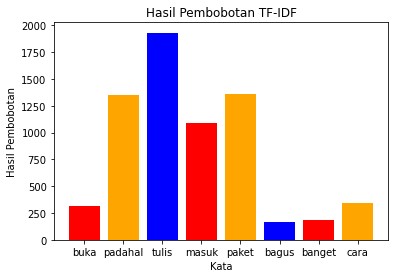

In [ ]:
import matplotlib.pyplot as plt

# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5,6,7,8]

# heights of bars
height = [316, 1348, 1931, 1093, 1357,167,185,344]

# labels for bars
tick_label = ["buka", "padahal", "tulis", "masuk", "paket","bagus","banget","cara"]

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'orange','blue'])

# naming the x-axis
plt.xlabel('Kata')
# naming the y-axis
plt.ylabel('Hasil Pembobotan')
# plot title
plt.title('Hasil Pembobotan TF-IDF')

# function to show the plot
plt.show()

merubah data training dan test ke data vektor menggunakan pembobotan tfid

In [ ]:
#pada data kita
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

print(x_test.shape)
print(x_test.shape)

(300, 3574)
(300, 3574)


In [ ]:
x_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#preproses data

proses svm

In [ ]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

acc_model = []
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(x_train,y_train)
    print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(x_test))))
    acc_model.append(accuracy_score(y_test, svm.predict(x_test)))

Akurasi untuk c = 0.01: 0.86
Akurasi untuk c = 0.05: 0.86
Akurasi untuk c = 0.25: 0.87
Akurasi untuk c = 0.5: 0.8566666666666667
Akurasi untuk c = 0.75: 0.86
Akurasi untuk c = 1: 0.8633333333333333


Training ulang menggunakan parameter regulasi yang baik

In [ ]:
#final model
svm = LinearSVC(C=0.75)
svm.fit(x_train, y_train)

LinearSVC(C=0.75)

Menampilkan akurasi

In [ ]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(x_test)))

Accuracy score model final: 0.86 


Lakukan prediksi terhadap seluruh dataset zenius

In [ ]:
dfZen = pd.read_excel("/content/zenius_data.xlsx")
dfZen.head()

,userName,ranting,tanggal,ulasan
0,Dewi Adikara,5,2022-06-27 13:20:04,"Dewi udah cobain Zenius, menyenangkan banget c..."
1,KEYSHA DWI SETIYANI,5,2022-06-27 12:57:24,pembelajaran seru dan mudahh dipahami
2,Sri Wahyuni,5,2022-06-27 05:58:22,Aplikasi Zenius sangat membantu adikku untuk b...
3,D.A.P Official,5,2022-06-27 05:41:55,Ada kurikulum baru kurikulum 2022 Implementasi...
4,Nabila Albatul,1,2022-06-27 04:59:09,Hai Zenius aku akan memberi 5 bintang nanti ka...


In [ ]:
prediction = []
for i in range(0,len(dfZen['ulasan'])):
  predict_transform = vectorizer.transform([dfZen['ulasan'][i]])
  prediction.append(svm.predict(predict_transform))

In [ ]:
dfZen['predict'] = prediction

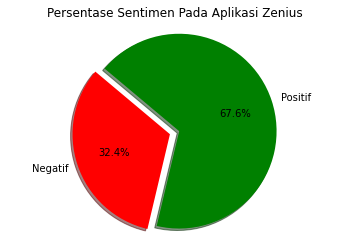

Negatif = 486
Positif = 1014
Jumlah Keseluruhan Data = 1500


In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Negatif', 'Positif'
sizes = [486, 1014]
colors = ['red', 'green']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Persentase Sentimen Pada Aplikasi Zenius")
plt.show()
print("Negatif =",sizes[0])
print("Positif =",sizes[1])
print("Jumlah Keseluruhan Data =",sum(sizes))

In [ ]:
dfZen.to_excel("zenPredict.xlsx", index = False)  #Save the file as CSV , to download: click the folder icon on the left. the csv file should be there.

#evaluasi model svm

Evaluasi dan menampilkan confussion matrix untuk menghitung evaluasi

In [ ]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = svm.predict(x_test)
print('Accuracy of SVM classifier on test set : {:.2f}'.format(svm.score(x_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of SVM classifier on test set : 0.86
[[  6  36]
 [  6 252]]
              precision    recall  f1-score   support

     negatif       0.50      0.14      0.22        42
     positif       0.88      0.98      0.92       258

    accuracy                           0.86       300
   macro avg       0.69      0.56      0.57       300
weighted avg       0.82      0.86      0.82       300



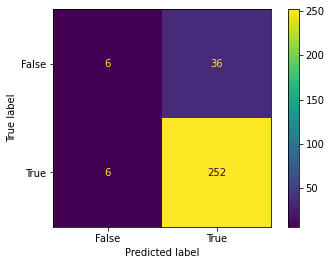

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()